<a href="https://colab.research.google.com/github/youkyung2/dataAnalysis/blob/master/KBO_%ED%83%80%EC%9E%90_OPS_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DataSet : https://dacon.io/competitions/official/235546/
# https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/Regular_Season_Batter.csv
# https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/Pre_Season_Batter.csv
# https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/Regular_Season_Batter_Day_by_Day_b4.csv
# https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/submission.csv
# [Files]
#① Regular_Season_Batter.csv : KBO에서 활약한 타자들의 역대 정규시즌 성적을 포함하여 몸무게, 키 ,생년월일 등의 기본정보
#② Regular_Season_Batter_Day_by_Day.csv: KBO에서 활약한 타자들의 일자 별 정규시즌 성적
#③ Pre_Season_Batter.csv : KBO에서 활약한 타자들의 역대 시범경기(정규시즌 직전에 여는 연습경기) 성적
#④ submission.csv : 참가자들이 예측해야 할 타자의 이름과 아이디 목록

In [1]:
# 시각화 설정
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

# 그래프 마이너스기호 표시되게 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# 프리시즌 데이터 로드
preseason_df = pd.read_csv('https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/Pre_Season_Batter.csv')
# 정규시즌 데이터 로드
regular_season_df = pd.read_csv('https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/Regular_Season_Batter.csv')
# 데이터 크기 확인
print(preseason_df.shape)
# 데이터 상단 출력
print(preseason_df.head())

(1393, 29)
   batter_id batter_name  ...  starting_salary    OPS
0          0        가르시아  ...              NaN  0.959
1          1         강경학  ...          10000만원  0.500
2          1         강경학  ...          10000만원    NaN
3          1         강경학  ...          10000만원  0.416
4          1         강경학  ...          10000만원  0.493

[5 rows x 29 columns]


In [3]:
preseason_df.head(2)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.55,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.00,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500


In [4]:
# 데이터 기초통계량 확인
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,2.430725,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,2.698122,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,4.000000,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,24.000000,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


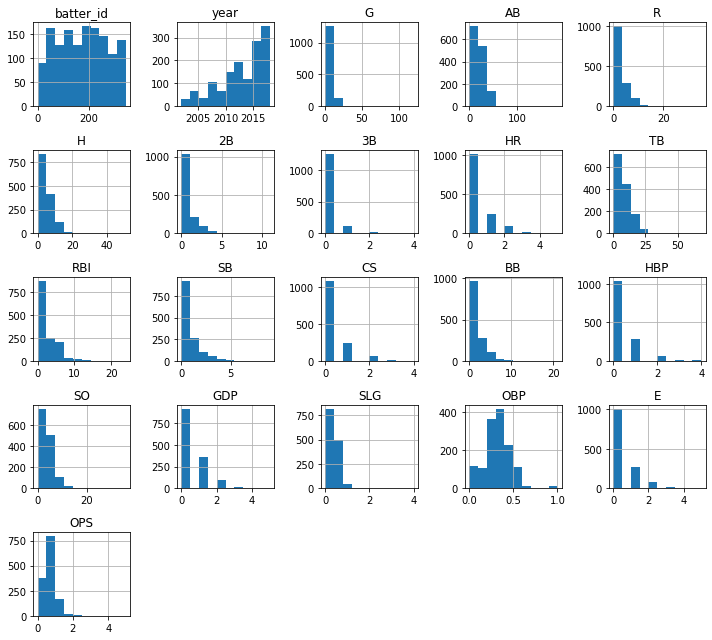

In [5]:
# 데이터시각화
preseason_df.hist(figsize=(10,9))
plt.tight_layout() #그래프 간격 설정
plt.show() # 과거 데이터일 수록 기록한 데이터 수가 적다

In [6]:
# 정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')

# 프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')

In [7]:
regular_season_df.head(3)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686


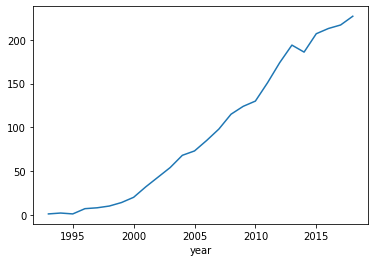

In [23]:
regular_count.plot()

In [22]:
regular_count.loc[2002:]

year
2002     43
2003     54
2004     68
2005     73
2006     85
2007     98
2008    115
2009    124
2010    130
2011    151
2012    174
2013    194
2014    186
2015    207
2016    213
2017    217
2018    227
Name: regular, dtype: int64

In [17]:
print(regular_count.head())
print(preseason_count.head())

year
1993    1
1994    2
1995    1
1996    7
1997    8
Name: regular, dtype: int64
year
2002    12
2003    19
2004    28
2005    37
2006    36
Name: preseason, dtype: int64


In [25]:
np.round(preseason_count/regular_count,2).rename('ratio')

year
1993     NaN
1994     NaN
1995     NaN
1996     NaN
1997     NaN
1998     NaN
1999     NaN
2000     NaN
2001     NaN
2002    0.28
2003    0.35
2004    0.41
2005    0.51
2006    0.42
2007    0.44
2008    0.53
2009    0.53
2010    0.55
2011    0.50
2012    0.50
2013    0.54
2014    0.63
2015    0.65
2016    0.72
2017    0.77
2018    0.80
Name: ratio, dtype: float64

In [28]:
pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count,2).rename('ratio')], axis =1).loc[2002:]

,regular,preseason,ratio
year,,,
2002,43,12.0,0.28
2003,54,19.0,0.35
2004,68,28.0,0.41
2005,73,37.0,0.51
2006,85,36.0,0.42
2007,98,43.0,0.44
2008,115,61.0,0.53
2009,124,66.0,0.53
2010,130,72.0,0.55


In [8]:
pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count,2).rename('ratio')], axis =1).transpose().loc[:,2002:] # 2002년부터 봄
# 해석 : 과거로 갈 수록 프리시즌의 기록이 정규시즌보다 적어짐

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [13]:
# 프리시즌의 성적과 정규시즌의 성적 간의 상관관계 구하기
regular_season_df['new_idx'] = regular_season_df['batter_name'] + regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

print(regular_season_df['new_idx'].head(3))
print(preseason_df['new_idx'].head(3))

0    가르시아2018
1     강경학2011
2     강경학2014
Name: new_idx, dtype: object
0    가르시아2018
1     강경학2011
2     강경학2014
Name: new_idx, dtype: object


In [14]:
# 새로운 인덱스의 교집합 (두 데이터의 성적을 비교하기위해 두 데이터에 공통으로 존재하는 선수들의 기록만 사용하기로 함)
intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))

print(intersection_idx)

['윤석민2017', '스크럭스2018', '이명기2018', '채태인2018', '이지영2017', '정의윤2005', '임병욱2017', '김재율2012', '김성욱2015', '손시헌2005', '강구성2013', '정상호2003', '정범모2012', '조동찬2012', '최진행2015', '박헌도2013', '이성열2011', '송광민2017', '유재신2008', '최정2011', '이성우2010', '배영섭2012', '백창수2010', '박기혁2007', '이종욱2008', '이진영2014', '손주인2013', '안치홍2009', '정수빈2015', '나지완2013', '김용의2016', '박해민2016', '박기혁2003', '장성우2009', '박한이2008', '정훈2016', '박병호2009', '손시헌2018', '이영욱2016', '송민섭2018', '정근우2005', '김상수2018', '김성현2012', '민병헌2015', '양석환2015', '이대호2009', '이지영2013', '정성훈2009', '손아섭2016', '정성훈2005', '오지환2011', '정성훈2002', '송민섭2015', '김주형2006', '김주형2016', '최준석2009', '오재일2010', '김문호2016', '조동찬2016', '이용규2013', '조동화2013', '조동찬2018', '박해민2017', '이준호2012', '하주석2012', '양성우2012', '이상호2014', '장성우2014', '정수빈2014', '손시헌2012', '박지규2015', '나주환2018', '나성범2018', '오재일2013', '정훈2017', '장승현2018', '이택근2014', '안치홍2018', '조수행2016', '허도환2016', '나지완2014', '이재원2010', '박준태2015', '이범호2015', '김재성2015', '강한울2017', '유재신2009', '박용택2002', '박민우2013', '박동원2018', '박세혁2016', 

In [39]:
# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()

In [15]:
regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)

0        True
1        True
2        True
3        True
4        True
        ...  
2449     True
2450    False
2451    False
2452    False
2453    False
Name: new_idx, Length: 2454, dtype: bool

In [17]:
regular_season_df['new_idx'][:10]

0    가르시아2018
1     강경학2011
2     강경학2014
3     강경학2015
4     강경학2016
5     강경학2017
6     강경학2018
7     강구성2013
8     강구성2015
9     강구성2016
Name: new_idx, dtype: object

In [26]:
regular_season_df.loc[regular_season_df['new_idx'] == '윤석민2017', 'new_idx']
# df.loc[df['hour'] <= 5, 'hour':'weight']

1364    윤석민2017
Name: new_idx, dtype: object

In [ ]:
# regular_season_df[regular_season_df['new_idx'] == '윤석민2017', 'new_idx']

In [30]:
regular_season_df.iloc[1364]['new_idx']

'윤석민2017'

In [33]:
regular_season_df.iloc[2452]['new_idx']

'황진수2017'

In [36]:
'황진수2017' in intersection_idx

False

In [37]:
'윤석민2017' in intersection_idx

True

In [32]:
test = regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)
print(test.iloc[1364])
print(test.iloc[2452])

True
False


In [40]:
regular_season_new = regular_season_new.sort_values(by='new_idx').reset_index(drop=True)

In [42]:
# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by='new_idx').reset_index(drop=True)

In [43]:
# 검정 코드
print(regular_season_new.shape, regular_season_new.shape)
sum(regular_season_new['new_idx'] == regular_season_new['new_idx'])

(1358, 30) (1358, 30)


1358

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


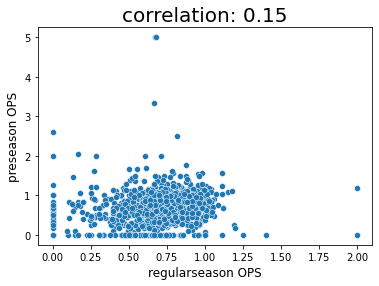

In [45]:
# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS'])
plt.title('correlation: ' + str(np.round(correlation,2)), fontsize=20)
plt.xlabel('regularseason OPS', fontsize=12)
plt.ylabel('preseason OPS', fontsize=12)
plt.show()

In [ ]:
# 상관관계 해석 :
# 정규시즌과 프리시즌의 성적 분포는 선형적인 모습이 아니다. => 상관성이 매우 낮다.

# EDA 를 통해 알아낸 사실
# 1. 프리시즌 데이터의 경기 기록 수는 매우 적으므로, 그 구성 역시 정규시즌 데이터와는 차이가 있을 수 있다.
# 2. 프리시즌 데이터와 정규시즌 데이터 간 상관관계는 매우 낮다.
# => 실제 분석에서는 프리시즌 데이터를 분석에서 제외할 것이다.